<img src="https://5264302.fs1.hubspotusercontent-na1.net/hubfs/5264302/Demo%20Asset%20Resources/CM-Demo-mdf-exchange-volume-Cover.png" width=1100 margin-left='auto' margin-right='auto'/>

Though decentralized finance has garnered significant attention in recent years, centralized exchanges remain a crucial cornerstone of the crypto asset industry. These trading venues serve as some of the deepest pools of liquidity for the top crypto assets, and facilitate the onboarding and offboarding of millions of users by sitting at the intersection of digital assets and fiat currencies. Coin Metrics collects a wide variety of data from a universe of 39+ top crypto exchanges, allowing our users to easily assess exchange dominance, asset trading volumes, and even the composition of trading patterns in specific markets.

## Resources
This notebook demonstrates basic functionality offered by the Coin Metrics Python API Client and Market Data Feed.

Coin Metrics offers a vast assortment of data for hundreds of cryptoassets. The Python API Client allows for easy access to this data using Python without needing to create your own wrappers using `requests` and other such libraries.

To understand the data that Coin Metrics offers, feel free to peruse the resources below.

- The [Coin Metrics API v4](https://docs.coinmetrics.io/api/v4) website contains the full set of endpoints and data offered by Coin Metrics.
- The [Coin Metrics Knowledge Base](https://docs.coinmetrics.io/info) gives detailed, conceptual explanations of the data that Coin Metrics offers.
- The [API Spec](https://coinmetrics.github.io/api-client-python/site/api_client.html) contains a full list of functions.

## Notebook Setup

In [1]:
from os import environ
import sys
import pandas as pd
import numpy as np
import logging
from datetime import date, datetime, timedelta
from coinmetrics.api_client import CoinMetricsClient
import json
import logging
import matplotlib.pyplot as plt
# import plotly.express as px
# import seaborn as sns
%matplotlib inline

In [2]:
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [3]:
# We recommend privately storing your API key in your local environment.
try:
    api_key = environ["CM_API_KEY"]
    logging.info("Using API key found in environment")
except KeyError:
    api_key = ""
    logging.info("API key not found. Using community client")
client = CoinMetricsClient(api_key)

2024-10-07 12:48:33 INFO     Using API key found in environment


## Daily Exchange Volumes

Coin Metrics creates aggregated metrics to allow users to easily compare the total trading volume of dominant centralized exchanges. By leveraging the *timeseries/exchange-metrics* endpoint, we can retrieve the daily reported spot trading volume for a single trading venue or a list of exchanges.

In [4]:
end = pd.to_datetime(datetime.now())
start = end - timedelta(days=28)

In [5]:
exchange_list = [
    e['exchange'] for e in client.get_snapshots_of_asset_metric_constituents(
        'volume_trusted_spot_usd_1d', at_time=end
    ).to_list()
]

In [6]:
volumes = client.get_exchange_metrics(
    exchanges=exchange_list,
    metrics='volume_reported_spot_usd_1d',
    frequency='1d',
    start_time=start,
    end_time=end
).to_dataframe()

In [7]:
top_volumes = volumes.groupby('exchange')['volume_reported_spot_usd_1d'].sum().sort_values(ascending=False)
volumes['exchange'] = np.where(volumes['exchange'].isin(top_volumes[:8].index), volumes['exchange'], 'other')

In [8]:
volumes = volumes.groupby(['exchange', 'time'])[['volume_reported_spot_usd_1d']].sum().reset_index()
exchange_list_truncated = list(volumes.exchange.unique())


In [9]:
pivot_volumes = volumes.pivot(
    index="time",
    columns="exchange",
    values="volume_reported_spot_usd_1d"
)

In [10]:
pivot_volumes.head()

exchange,binance,bullish,bybit,coinbase,crypto.com,gate.io,huobi,okex,other
time,,,,,,,,,
2024-09-10 00:00:00+00:00,9714347717.47266,1264837837.1639,3667152874.20169,1323434212.37803,4694543620.14163,845127903.462162,1605960239.92127,1293157356.51002,1340992725.680607
2024-09-11 00:00:00+00:00,12274439317.785299,1102465276.62474,4522846470.92285,1706654989.73028,7265287964.56301,1116958520.42675,1758439622.21422,1589552806.98192,1766919607.712266
2024-09-12 00:00:00+00:00,11296654011.844999,1071014247.32579,4144560926.66379,1781063003.281,4845335792.93472,1035902360.91803,1640974256.92128,1418484926.0031,1631462282.025268
2024-09-13 00:00:00+00:00,11925481195.452999,1073344439.24967,4164462938.08954,1832416834.75893,4559652705.02926,1060397918.39275,1602703737.9729,1544920512.39772,1847874572.934688
2024-09-14 00:00:00+00:00,6374474955.75626,391985441.722983,2230639306.76154,1137971743.1438,1992728998.68231,587007576.028109,1267693924.07889,961073483.60885,870317615.504417


In [11]:
pivot_volumes[exchange_list_truncated]

exchange,binance,bullish,bybit,coinbase,crypto.com,gate.io,huobi,okex,other
time,,,,,,,,,
2024-09-10 00:00:00+00:00,9714347717.47266,1264837837.1639,3667152874.20169,1323434212.37803,4694543620.14163,845127903.462162,1605960239.92127,1293157356.51002,1340992725.680607
2024-09-11 00:00:00+00:00,12274439317.785299,1102465276.62474,4522846470.92285,1706654989.73028,7265287964.56301,1116958520.42675,1758439622.21422,1589552806.98192,1766919607.712266
2024-09-12 00:00:00+00:00,11296654011.844999,1071014247.32579,4144560926.66379,1781063003.281,4845335792.93472,1035902360.91803,1640974256.92128,1418484926.0031,1631462282.025268
2024-09-13 00:00:00+00:00,11925481195.452999,1073344439.24967,4164462938.08954,1832416834.75893,4559652705.02926,1060397918.39275,1602703737.9729,1544920512.39772,1847874572.934688
2024-09-14 00:00:00+00:00,6374474955.75626,391985441.722983,2230639306.76154,1137971743.1438,1992728998.68231,587007576.028109,1267693924.07889,961073483.60885,870317615.504417
2024-09-15 00:00:00+00:00,7361704730.28157,562957320.711511,2590884166.76392,832798774.766878,2931984212.55974,760804668.552838,1124162599.40243,997351542.148314,1032771425.499747
2024-09-16 00:00:00+00:00,12134299152.8419,1060106347.58518,4165725283.318,1361649870.77583,4722670462.41982,1191365703.76154,1583872653.47973,1593737943.29678,1535830455.197682
2024-09-17 00:00:00+00:00,12784370854.8181,1370902890.66798,4599028084.1107,1783827256.9648,4323879290.27791,1164978755.28512,1572931912.75403,1735321786.52275,1939514486.618056
2024-09-18 00:00:00+00:00,13949094048.295601,1509743657.16933,5191983189.97371,1812085945.13132,6524939071.87054,1588197115.85748,1677643847.70291,2025256403.67754,2131259660.134958


(19976.0, 20002.0)

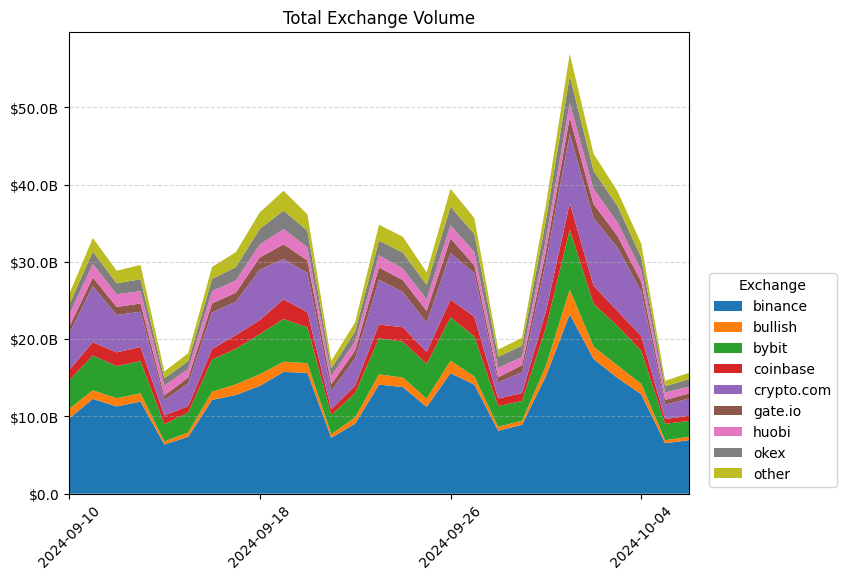

In [12]:
def format_ticks_usd(y, pos):
    if y >= 1_000_000_000_000:
        return '${:.1f}T'.format(y/1000000000000)
    elif y >= 1_000_000_000:
        return '${:.1f}B'.format(y/1000000000)
    elif y >= 1000000:
        return '${:.1f}M'.format(y/1000000)
    elif y >= 1000:
        return '${:.1f}K'.format(y/1000)
    else:
        return '${:.1f}'.format(y)

fig, ax = plt.subplots(figsize=(8,6))

ax.stackplot(
    pivot_volumes.index,
    [pivot_volumes[exchange].astype(float) for exchange in exchange_list_truncated],
    labels=exchange_list_truncated,
)
ax.set_title("Total Exchange Volume")
ax.yaxis.set_major_formatter(format_ticks_usd)
ax.yaxis.grid(visible=True, which='major', linestyle='--', alpha=0.5)
ax.legend(loc='lower right', bbox_to_anchor=(1.25, 0), title="Exchange")
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_xlim(volumes.time.min(), volumes.time.max())

In [13]:
pivot_volume_share = 100*pivot_volumes[exchange_list_truncated].div(pivot_volumes[exchange_list_truncated].sum(axis=1), axis=0)

(0.0, 100.0)

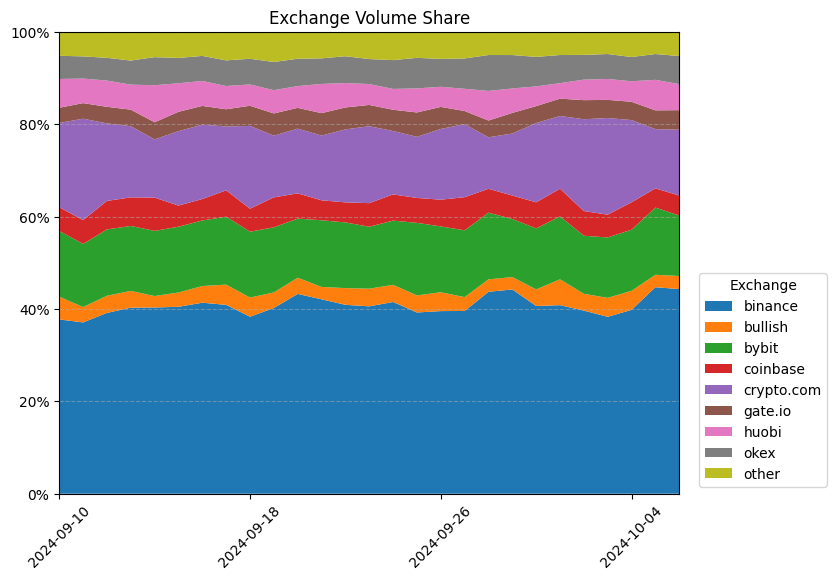

In [14]:
import matplotlib.ticker as mtick


fig, ax = plt.subplots(figsize=(8,6))

ax.stackplot(
    pivot_volume_share.index,
    [pivot_volume_share[exchange].astype(float) for exchange in exchange_list_truncated],
    labels=exchange_list_truncated,
)
ax.set_title("Exchange Volume Share")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.grid(visible=True, which='major', linestyle='--', alpha=0.5)
ax.legend(loc='lower right', bbox_to_anchor=(1.25, 0), title="Exchange")
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_xlim(volumes.time.min(), volumes.time.max())
ax.set_ylim(0, 100)

## Asset Share

In addition to retrieving aggregated trading volumes for all markets on an exchange, we can also utilize the *timeseries/market-candles* to obtain the USD trading volume of individual markets on a particular exchange.

In [15]:
# The wildcard parameter (*) enables users to retrieve all markets matching the designated format
exchange = 'coinbase'
markets=f"{exchange}-*-spot"

In [16]:
df = client.get_market_candles(
    markets=markets,
    start_time=start,
    end_time=end,
    frequency='1d',
    page_size=10000
).parallel(time_increment=timedelta(days=1)).to_dataframe()

Exporting to dataframe type: 100%|██████████████████████████████████████████████████| 28/28 [00:02<00:00,  9.86it/s]


In [17]:
df

,market,time,price_open,price_close,price_high,price_low,vwap,volume,candle_usd_volume,candle_trades_count
0,coinbase-00-usd-spot,2024-09-10 00:00:00+00:00,0.0369,0.0361,0.0393,0.036,0.037349,4538849.98,169520.073709,1586
1,coinbase-1inch-btc-spot,2024-09-10 00:00:00+00:00,0.000005,0.000005,0.000005,0.000005,0.000005,14287.41,3720.280159,21
2,coinbase-1inch-eur-spot,2024-09-10 00:00:00+00:00,0.238,0.237,0.239,0.232,0.236182,616552.97,160541.151569,271
3,coinbase-1inch-gbp-spot,2024-09-10 00:00:00+00:00,0.201,0.199,0.201,0.196,0.199207,358978.94,93500.859211,194
4,coinbase-1inch-usd-spot,2024-09-10 00:00:00+00:00,0.263,0.26,0.264,0.256,0.259755,3483735.74,904916.71491,2772
...,...,...,...,...,...,...,...,...,...,...
11027,coinbase-zen-usd-spot,2024-10-06 00:00:00+00:00,7.49,8.01,8.04,7.49,7.726637,3059.792,23641.90321,243
11028,coinbase-zeta-usd-spot,2024-10-06 00:00:00+00:00,0.5964,0.6084,0.6121,0.5815,0.59916,666852.1,399550.77625,3258
11029,coinbase-zk-usd-spot,2024-10-06 00:00:00+00:00,0.12432,0.12904,0.13047,0.12409,0.126848,562305.1,71327.114648,462
11030,coinbase-zro-usd-spot,2024-10-06 00:00:00+00:00,4.109,4.236,4.253,4.067,4.162722,119387.31,496976.15616,1341


In [18]:
df["candle_usd_volume"] = df.candle_usd_volume.astype(float)
df["time"] = pd.to_datetime(df.time)

In [19]:
df.sort_values(["market","time"],inplace=True)
    
# Create Addt. Cols
df['exchange'] = df.market.apply(lambda x: x.split("-")[0])
df['exchange-base'] = df.market.apply(lambda x: x.split("-")[0]+"-"+x.split("-")[1])
df['market_type'] = df.market.apply(lambda x: x.split("-")[-1])
df['base'] = df.market.apply(lambda x: x.split("-")[1])
df['quote'] = df.market.apply(lambda x: x.split("-")[2])

# Get volume by base asset by day

# Get top 10 assets by volume
total_vol_by_base = df.groupby('base',as_index=False).candle_usd_volume.sum()
total_vol_by_base.sort_values(by="candle_usd_volume",inplace=True)
base_top_list = total_vol_by_base.tail(10).base.tolist()
df["base2"] = np.where(df.base.isin(base_top_list),df.base,f"{len(total_vol_by_base)-10} others")

# Get sum by base asset by day
df_vol_by_base = df.groupby(["time","base2"],as_index=False).candle_usd_volume.sum()
df_vol_by_base['total_vol'] = df_vol_by_base.groupby("time").candle_usd_volume.transform(sum)
df_vol_by_base.columns=["time","base_asset","vol","total_vol"]
df_vol_by_base["vol_pct"]=(df_vol_by_base.vol/df_vol_by_base.total_vol)*100
df_vol_by_base.sort_values(["base_asset","time"],inplace=True)

In [20]:
df_vol_by_base

,time,base_asset,vol,total_vol,vol_pct
0,2024-09-10 00:00:00+00:00,248 others,2.285934e+08,1.325089e+09,17.251175
11,2024-09-11 00:00:00+00:00,248 others,2.546721e+08,1.708684e+09,14.904575
22,2024-09-12 00:00:00+00:00,248 others,2.478359e+08,1.783317e+09,13.897469
33,2024-09-13 00:00:00+00:00,248 others,2.823741e+08,1.834706e+09,15.390699
44,2024-09-14 00:00:00+00:00,248 others,1.710470e+08,1.139076e+09,15.016301
...,...,...,...,...,...
252,2024-10-02 00:00:00+00:00,xrp,1.025636e+08,2.355545e+09,4.354134
263,2024-10-03 00:00:00+00:00,xrp,8.681132e+07,1.934456e+09,4.487634
274,2024-10-04 00:00:00+00:00,xrp,4.813218e+07,1.924832e+09,2.500591
285,2024-10-05 00:00:00+00:00,xrp,1.525881e+07,6.100742e+08,2.501140


In [21]:
num_assets = len(total_vol_by_base)
top_assets  = df_vol_by_base[~df_vol_by_base.base_asset.isin(["btc","eth",f"{num_assets-10} others"])].groupby("base_asset").vol.sum().sort_values(ascending=False).index.tolist()
top_assets  = ["btc","eth",f"{num_assets-10} others"] + top_assets

# Pivot back to assets in columns
df_vol_pivot = df_vol_by_base.pivot(index='time',
                             columns="base_asset",
                             values="vol_pct")


In [22]:
df_vol_pivot = df_vol_pivot[top_assets]
df_vol_pivot

base_asset,btc,eth,248 others,usdt,sol,sui,xrp,bonk,doge,shib,fet
time,,,,,,,,,,,
2024-09-10 00:00:00+00:00,30.972149,13.067446,17.251175,24.945950,6.146731,1.292479,1.117807,1.095419,1.176307,0.505209,2.429329
2024-09-11 00:00:00+00:00,42.533098,14.601279,14.904575,16.508054,5.409347,0.986693,0.859503,0.918263,1.086848,0.510467,1.681872
2024-09-12 00:00:00+00:00,36.055903,11.246405,13.897469,24.472115,5.432146,2.323582,2.768770,0.686577,0.897056,0.317287,1.902690
2024-09-13 00:00:00+00:00,41.600482,12.469632,15.390699,17.687048,5.396664,1.283156,1.744660,0.639577,2.029411,0.438210,1.320460
2024-09-14 00:00:00+00:00,18.104549,7.169948,15.016301,46.855937,4.118700,1.842687,3.210786,0.853040,1.347843,0.469507,1.010702
2024-09-15 00:00:00+00:00,31.125051,16.348491,22.996837,10.391716,7.648190,3.747606,2.454636,1.244448,1.527748,0.543500,1.971777
2024-09-16 00:00:00+00:00,37.193874,17.206186,14.866560,17.164195,5.416218,2.069775,2.074828,0.735451,1.292425,0.482445,1.498044
2024-09-17 00:00:00+00:00,43.462805,13.122193,14.039608,16.877017,4.806221,2.639338,1.338655,0.617046,1.527054,0.304794,1.265270
2024-09-18 00:00:00+00:00,42.578945,14.389160,16.363534,10.759089,6.367782,4.161422,1.541983,0.689565,1.025603,0.504158,1.618760


(0.0, 100.0)

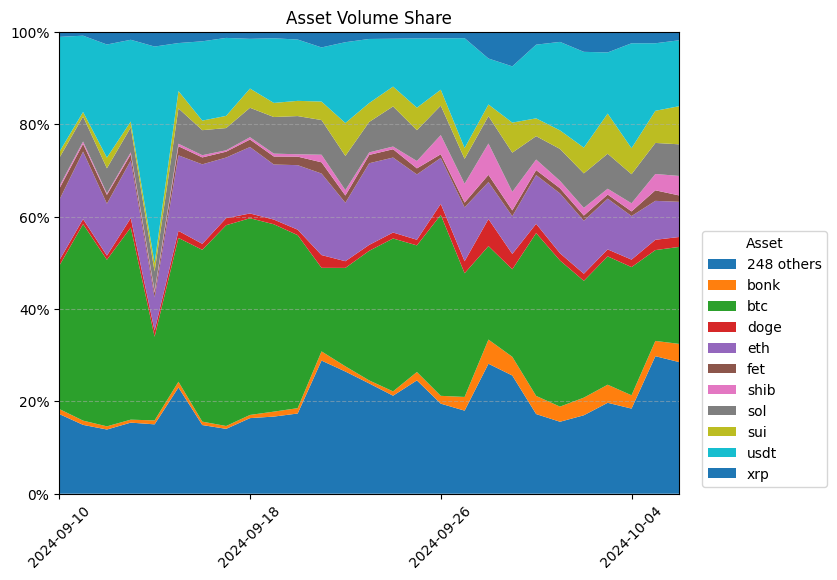

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

ax.stackplot(
    df_vol_pivot.index,
    [df_vol_pivot[asset].astype(float) for asset in df_vol_by_base.base_asset.unique()],
    labels=df_vol_by_base.base_asset.unique(),
)
ax.set_title("Asset Volume Share")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.grid(visible=True, which='major', linestyle='--', alpha=0.5)
ax.legend(loc='lower right', bbox_to_anchor=(1.25, 0), title="Asset")
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_xlim(volumes.time.min(), volumes.time.max())
ax.set_ylim(0, 100)

## Retrieve Trade Sizes

Trade size is a useful metric for understanding the composition of an exchange's trading patterns. Is the platform more popular for retail traders, or large institutions? Which assets are driven by whale trades vs. small buys? These patterns are especially relevant for venues like Coinbase, where fee revenue is determined by trade size.

In [24]:
def get_trade_size_stats(start,end,market):
    """ 
    For a given date and market, get stats on number of trades and dist of trade sizes 
        Returns a df with:
             Number of trades
             Volume (USD/Native)
             Number of trades by size groupings
             Volume derived from trades of various size groupings
    """
    
    #Call api
    df_trades = client.get_market_trades(
        markets=market,
        start_time=start,
        end_time=end,
        page_size=10000
    ).parallel(time_increment=timedelta(hours=1)).to_dataframe()
    #Prep data
    df_trades["amount_usd"] = df_trades.amount*df_trades.price
    df_trades["amount_usd_groups"] = pd.cut(df_trades["amount_usd"],bins=[0,1e3,1e4,1e5,1e6,1e7,1e100])
    print(df_trades.time.min())
    print(df_trades.time.max())

    #Get stats by group
    sum_count_by_size = df_trades.groupby("amount_usd_groups").agg({"amount_usd":['count',sum]})
    
    #Collect into a df
    df_day = pd.DataFrame()

    df_day.loc[start,"NumTrades"] = len(df_trades)
    df_day.loc[start,"VolUSD"] = df_trades.amount_usd.sum()
    df_day.loc[start,"VolNTV"] = df_trades.amount.sum()

    df_day.loc[start,"AvgSizeUSD"] = df_trades.amount_usd.mean()
    df_day.loc[start,"MedSizeUSD"] = df_trades.amount_usd.median()
    df_day.loc[start,"MaxSizeUSD"] = df_trades.amount_usd.max()

    df_day.loc[start,"NumTrades_0-1K"]      = sum_count_by_size.iloc[0,0]
    df_day.loc[start,"NumTrades_1K-10K"]    = sum_count_by_size.iloc[1,0]
    df_day.loc[start,"NumTrades_10K-100K"]  = sum_count_by_size.iloc[2,0]
    df_day.loc[start,"NumTrades_100K-1M"]   = sum_count_by_size.iloc[3,0]
    df_day.loc[start,"NumTrades_1M-10M"]    = sum_count_by_size.iloc[4,0]
    df_day.loc[start,"NumTrades_10M-Over"]  = sum_count_by_size.iloc[5,0]

    df_day.loc[start,"VolUSD_Trades_0-1K"]     = sum_count_by_size.iloc[0,1]
    df_day.loc[start,"VolUSD_Trades_1K-10K"]   = sum_count_by_size.iloc[1,1]
    df_day.loc[start,"VolUSD_Trades_10K-100K"] = sum_count_by_size.iloc[2,1]
    df_day.loc[start,"VolUSD_Trades_100K-1M"]  = sum_count_by_size.iloc[3,1]
    df_day.loc[start,"VolUSD_Trades_1M-10M"]   = sum_count_by_size.iloc[4,1]
    df_day.loc[start,"VolUSD_Trades_10M-Over"] = sum_count_by_size.iloc[5,1]
    
    return df_day

In [25]:
start = datetime.today() - timedelta(hours=24)
end = datetime.today()

In [26]:
df = get_trade_size_stats(start, end,'coinbase-btc-usd-spot')

Exporting to dataframe type: 100%|██████████████████████████████████████████████████| 25/25 [00:04<00:00,  5.16it/s]

2024-10-06 12:48:39.766637+00:00
2024-10-07 12:48:31.860605+00:00


In [27]:
df.head()

,NumTrades,VolUSD,VolNTV,AvgSizeUSD,MedSizeUSD,MaxSizeUSD,NumTrades_0-1K,NumTrades_1K-10K,NumTrades_10K-100K,NumTrades_100K-1M,NumTrades_1M-10M,NumTrades_10M-Over,VolUSD_Trades_0-1K,VolUSD_Trades_1K-10K,VolUSD_Trades_10K-100K,VolUSD_Trades_100K-1M,VolUSD_Trades_1M-10M,VolUSD_Trades_10M-Over
2024-10-06 12:48:39.638626,233725.0,2.681840e+08,4249.99384,1147.434052,48.436912,475567.911314,187168.0,41234.0,5278.0,45.0,0.0,0.0,1.983836e+07,1.350884e+08,1.056560e+08,7.601298e+06,0.0,0.0


In [28]:
df.transpose()#.rename_axis('value')

,2024-10-06 12:48:39.638626
NumTrades,2.337250e+05
VolUSD,2.681840e+08
VolNTV,4.249994e+03
AvgSizeUSD,1.147434e+03
MedSizeUSD,4.843691e+01
MaxSizeUSD,4.755679e+05
NumTrades_0-1K,1.871680e+05
NumTrades_1K-10K,4.123400e+04
NumTrades_10K-100K,5.278000e+03
NumTrades_100K-1M,4.500000e+01


In [29]:
trade_sizes = df[['VolUSD_Trades_0-1K',
                  'VolUSD_Trades_1K-10K',
                  'VolUSD_Trades_10K-100K',
                  'VolUSD_Trades_100K-1M',
                  'VolUSD_Trades_1M-10M',
                  'VolUSD_Trades_10M-Over']]

trade_sizes = trade_sizes.rename(columns=lambda x: x.split('_')[2])
trade_sizes

,0-1K,1K-10K,10K-100K,100K-1M,1M-10M,10M-Over
2024-10-06 12:48:39.638626,1.983836e+07,1.350884e+08,1.056560e+08,7.601298e+06,0.0,0.0


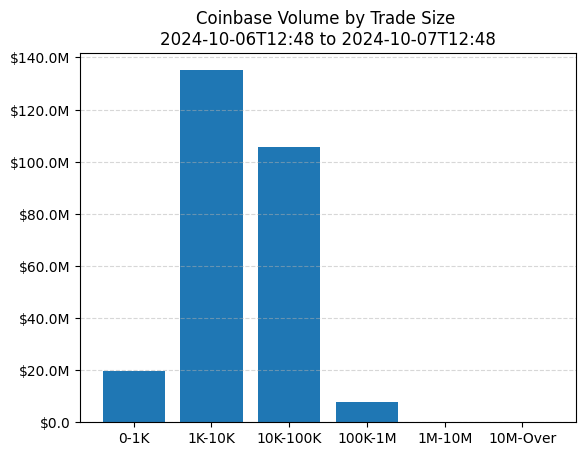

In [30]:
fig, ax = plt.subplots()
ax.bar(
    x=trade_sizes.columns,
    height=np.hstack([trade_sizes[c].astype(float) for c in trade_sizes.columns])
)

ax.set_title(f"Coinbase Volume by Trade Size \n{start.isoformat()[:16]} to {end.isoformat()[:16]}")
ax.yaxis.set_major_formatter(format_ticks_usd)
ax.yaxis.grid(visible=True, which='major', linestyle='--', alpha=0.5)
